In [1]:
"""
Tugas 2 : PR Pergeseran vektor ciri dan klasifikasi 3 kelas dengan Jarak Euclidean
Author  : Muhammad Rizqi Subeno
NIM     : 22/495313/PTK/14431
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.array([[0.36, 0.47], [0.36, 0.57], [0.15, 0.57], [0.10, 0.78],
                 [0.21, 0.83], [0.41, 0.10], [0.62, 0.05], [0.67, 0.15],
                 [0.93, 0.00], [0.93, 0.05], [0.99, 0.21], [0.57, 0.05],
                 [0.83, 0.83], [0.73, 0.93], [0.57, 0.57], [0.99, 0.57]])

In [3]:
# feature vector (vektor ciri)
ciri = np.array([[0.24, 0.64], [0.73, 0.09], [0.78, 0.73]])

## Fungsi transformasi ciri 2d
$$ x_{1new} = \frac{1}{1+e^{-func_{x1}}}$$
$$ x_{2new} = \frac{1}{1+e^{-func_{x2}}}$$

In [4]:
def sigmoid_2d_feature_transform(func_x1, func_x2):
    x1_new = 1/(1+np.exp(-func_x1))
    x2_new = 1/(1+np.exp(-func_x2))
    return np.array([x1_new, x2_new]).T

## Fungsi Dilatasi (Penskalaan)
$$\begin{pmatrix}
   x1_{baru} \\
   x2_{baru}
\end{pmatrix}=
\begin{pmatrix}
   a & 0 \\
   0 & b
\end{pmatrix}
\begin{pmatrix}
   (x1_{lama}-k) \\
   (x2_{lama}-l)
\end{pmatrix}+\begin{pmatrix}
   k \\
   l
\end{pmatrix}$$

In [5]:
def dilation(x1, x2, a, b, k, l):
    x1_new = a*(x1-k)+k
    x2_new = a*(x2-l)+l
    return np.array([x1_new, x2_new]).T

## Fungsi rotasi
$$A_{baru}=\begin{pmatrix}
   x1_{baru} \\
   x2_{baru}
\end{pmatrix}=
\begin{pmatrix}
   cos \alpha & -sin \alpha \\
   sin \beta & cos \beta
\end{pmatrix}
\begin{pmatrix}
   (x1_{lama}-m) \\
   (x2_{lama}-n)
\end{pmatrix}+\begin{pmatrix}
   m \\
   n
\end{pmatrix}$$

In [6]:
def rotation(x1, x2, alpha, beta, m, n):
    x1_new = (np.cos(alpha*(np.pi/180.0))*(x1-m)-np.sin(alpha*(np.pi/180.0))*(x2-n))+m
    x2_new = (np.sin(beta*(np.pi/180.0))*(x1-m)+np.cos(beta*(np.pi/180.0))*(x2-n))+n
    return np.array([x1_new, x2_new]).T

In [7]:
x1 = data[:,0]
x2 = data[:,1]
x_new = sigmoid_2d_feature_transform(8*(x1-0.1*x2-0.42),8*(x2-0.1*x1-0.35))

ciri_x1 = ciri[:,0]
ciri_x2 = ciri[:,1]
ciri_new = sigmoid_2d_feature_transform(8*(ciri_x1-0.1*ciri_x2-0.42),8*(ciri_x2-0.1*ciri_x1-0.35))

#print(ciri_new)
df = pd.DataFrame({"x1":data[:,0], "x2":data[:,1], "x1new":np.round(x_new[:,0],3), "x2new":np.round(x_new[:,1],3)})

# index tabel dimulai dari 1
df.index += 1

display(df)


,x1,x2,x1new,x2new
1,0.36,0.47,0.298,0.662
2,0.36,0.57,0.282,0.813
3,0.15,0.57,0.068,0.838
4,0.10,0.78,0.040,0.966
5,0.21,0.83,0.088,0.975
6,0.41,0.10,0.460,0.089
7,0.62,0.05,0.826,0.052
8,0.67,0.15,0.868,0.106
9,0.93,0.00,0.983,0.028
10,0.93,0.05,0.983,0.041


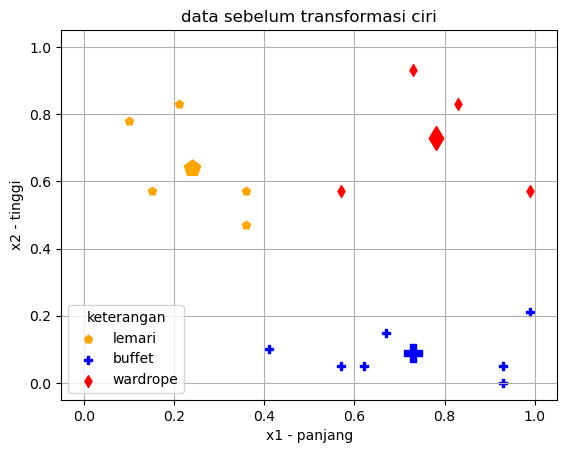

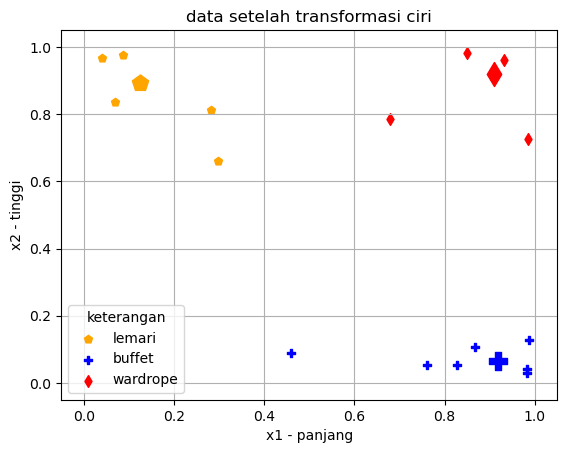

In [8]:
plt.scatter(data[0:5,0], data[0:5,1], color="orange", marker='p', label="lemari")
plt.scatter(data[5:12,0], data[5:12,1], color="blue", marker='P', label="buffet")
plt.scatter(data[12:16,0], data[12:16,1], color="red", marker='d', label="wardrope")
plt.scatter(ciri[0,0], ciri[0,1], color="orange", marker='p', s=150)
plt.scatter(ciri[1,0], ciri[1,1], color="blue", marker='P', s=150)
plt.scatter(ciri[2,0], ciri[2,1], color="red", marker='d', s=150)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel("x1 - panjang")
plt.ylabel("x2 - tinggi")
plt.grid(True)
plt.legend(title="keterangan")
plt.title("data sebelum transformasi ciri")
plt.show()
plt.scatter(x_new[0:5,0], x_new[0:5,1], color="orange", marker='p', label="lemari")
plt.scatter(x_new[5:12,0], x_new[5:12,1], color="blue", marker='P', label="buffet")
plt.scatter(x_new[12:16,0], x_new[12:16,1], color="red", marker='d', label="wardrope")
plt.scatter(ciri_new[0,0], ciri_new[0,1], color="orange", marker='p', s=150)
plt.scatter(ciri_new[1,0], ciri_new[1,1], color="blue", marker='P', s=150)
plt.scatter(ciri_new[2,0], ciri_new[2,1], color="red", marker='d', s=150)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel("x1 - panjang")
plt.ylabel("x2 - tinggi")
plt.grid(True)
plt.legend(title="keterangan")
plt.title("data setelah transformasi ciri")
plt.show()

## Using Euclidean Distance
$$ED(A,B) = \sqrt{\sum_{k=1}^N(a_k-b_k)^2}$$

In [9]:
def euclidean_distance(data, ciri):
    jumlah_data, _ = data.shape
    jumlah_kelas_ciri, jumlah_ciri = ciri.shape
    output_array = np.zeros([jumlah_data, jumlah_kelas_ciri])

    for i in range(jumlah_kelas_ciri):
        for j in range(jumlah_data):
            out = 0
            for k in range(jumlah_ciri):
                out += (data[j,k]-ciri[i,k])**2
            output_array[j,i]=np.sqrt(out)
            
    return output_array


## Using City-Block Distance
$$CB(A,B) = \sum_{k=1}^{N}|{a_k-b_k}|$$

In [10]:
def cityblock_distance(data, ciri):
    jumlah_data, _ = data.shape
    jumlah_kelas_ciri, jumlah_ciri = ciri.shape
    output_array = np.zeros([jumlah_data, jumlah_kelas_ciri])

    for i in range(jumlah_kelas_ciri):
        for j in range(jumlah_data):
            out = 0
            for k in range(jumlah_ciri):
                out += np.abs((data[j,k]-ciri[i,k]))
            output_array[j,i]=out
            
    return output_array

In [11]:
out = euclidean_distance(x_new,ciri_new)

df["s1"]=out[:,0]
df["s2"]=out[:,1]
df["s3"]=out[:,2]

display(df)


,x1,x2,x1new,x2new,s1,s2,s3
1,0.36,0.47,0.298,0.662,0.289620,0.860044,0.661916
2,0.36,0.57,0.282,0.813,0.176646,0.981833,0.635516
3,0.15,0.57,0.068,0.838,0.079394,1.148020,0.844276
4,0.10,0.78,0.040,0.966,0.111606,1.258027,0.870120
5,0.21,0.83,0.088,0.975,0.089520,1.231647,0.822989
6,0.41,0.10,0.460,0.089,0.871994,0.457964,0.942711
7,0.62,0.05,0.826,0.052,1.095682,0.091974,0.869581
8,0.67,0.15,0.868,0.106,1.083200,0.064218,0.813423
9,0.93,0.00,0.983,0.028,1.219448,0.075632,0.893094
10,0.93,0.05,0.983,0.041,1.209611,0.069476,0.879842


In [12]:
# check 
detect = np.empty(shape=len(df),dtype=object)
size, _ = out.shape
for i in range(0,size):
    if (np.argmin(out[i]) == 0):
        detect[i] = "lemari"
    elif (np.argmin(out[i]) == 1):
        detect[i] = "buffet"
    elif (np.argmin(out[i]) == 2):
        detect[i] = "wardrope"
    else:
        detect[i] = "unknown"

#buat kolom baru untuk masukkan ke tabel baru
df2 = pd.DataFrame({"deteksi": detect})
#print(s)
df["deteksi"] = df2["deteksi"].values
display(df)

,x1,x2,x1new,x2new,s1,s2,s3,deteksi
1,0.36,0.47,0.298,0.662,0.289620,0.860044,0.661916,lemari
2,0.36,0.57,0.282,0.813,0.176646,0.981833,0.635516,lemari
3,0.15,0.57,0.068,0.838,0.079394,1.148020,0.844276,lemari
4,0.10,0.78,0.040,0.966,0.111606,1.258027,0.870120,lemari
5,0.21,0.83,0.088,0.975,0.089520,1.231647,0.822989,lemari
6,0.41,0.10,0.460,0.089,0.871994,0.457964,0.942711,buffet
7,0.62,0.05,0.826,0.052,1.095682,0.091974,0.869581,buffet
8,0.67,0.15,0.868,0.106,1.083200,0.064218,0.813423,buffet
9,0.93,0.00,0.983,0.028,1.219448,0.075632,0.893094,buffet
10,0.93,0.05,0.983,0.041,1.209611,0.069476,0.879842,buffet
